import the `tidyverse`

In [1]:
library('tidyverse')
theme_set(theme_gray(base_size = 22))
options(repr.plot.width=8, repr.plot.height=6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Boxplots

Let's use the otter skull data set again.

In [2]:
# uncomment the following:

otter.data = read.csv('https://jcoliver.github.io/learn-r/data/otter-mandible-data.csv') %>%
    gather(characteristic, value, -species, -museum, -accession)

otter.data %>% head

,species,museum,accession,characteristic,value
,<chr>,<chr>,<chr>,<chr>,<dbl>
1,A. cinerea,AMNH,101458,m1,15.100
2,A. cinerea,AMNH,101461,m1,12.740
3,A. cinerea,AMNH,101466,m1,12.425
4,A. cinerea,AMNH,101635,m1,13.400
5,A. cinerea,AMNH,101459,m1,14.400
6,A. cinerea,AMNH,101462,m1,14.525


We'll filter out every row except for those representing the `m1` characgeristic

In [3]:
# uncomment the following:

df.m1 = otter.data %>% filter(characteristic == 'm1') %>% drop_na()

df.m1 %>% head

,species,museum,accession,characteristic,value
,<chr>,<chr>,<chr>,<chr>,<dbl>
1,A. cinerea,AMNH,101458,m1,15.100
2,A. cinerea,AMNH,101461,m1,12.740
3,A. cinerea,AMNH,101466,m1,12.425
4,A. cinerea,AMNH,101635,m1,13.400
5,A. cinerea,AMNH,101459,m1,14.400
6,A. cinerea,AMNH,101462,m1,14.525


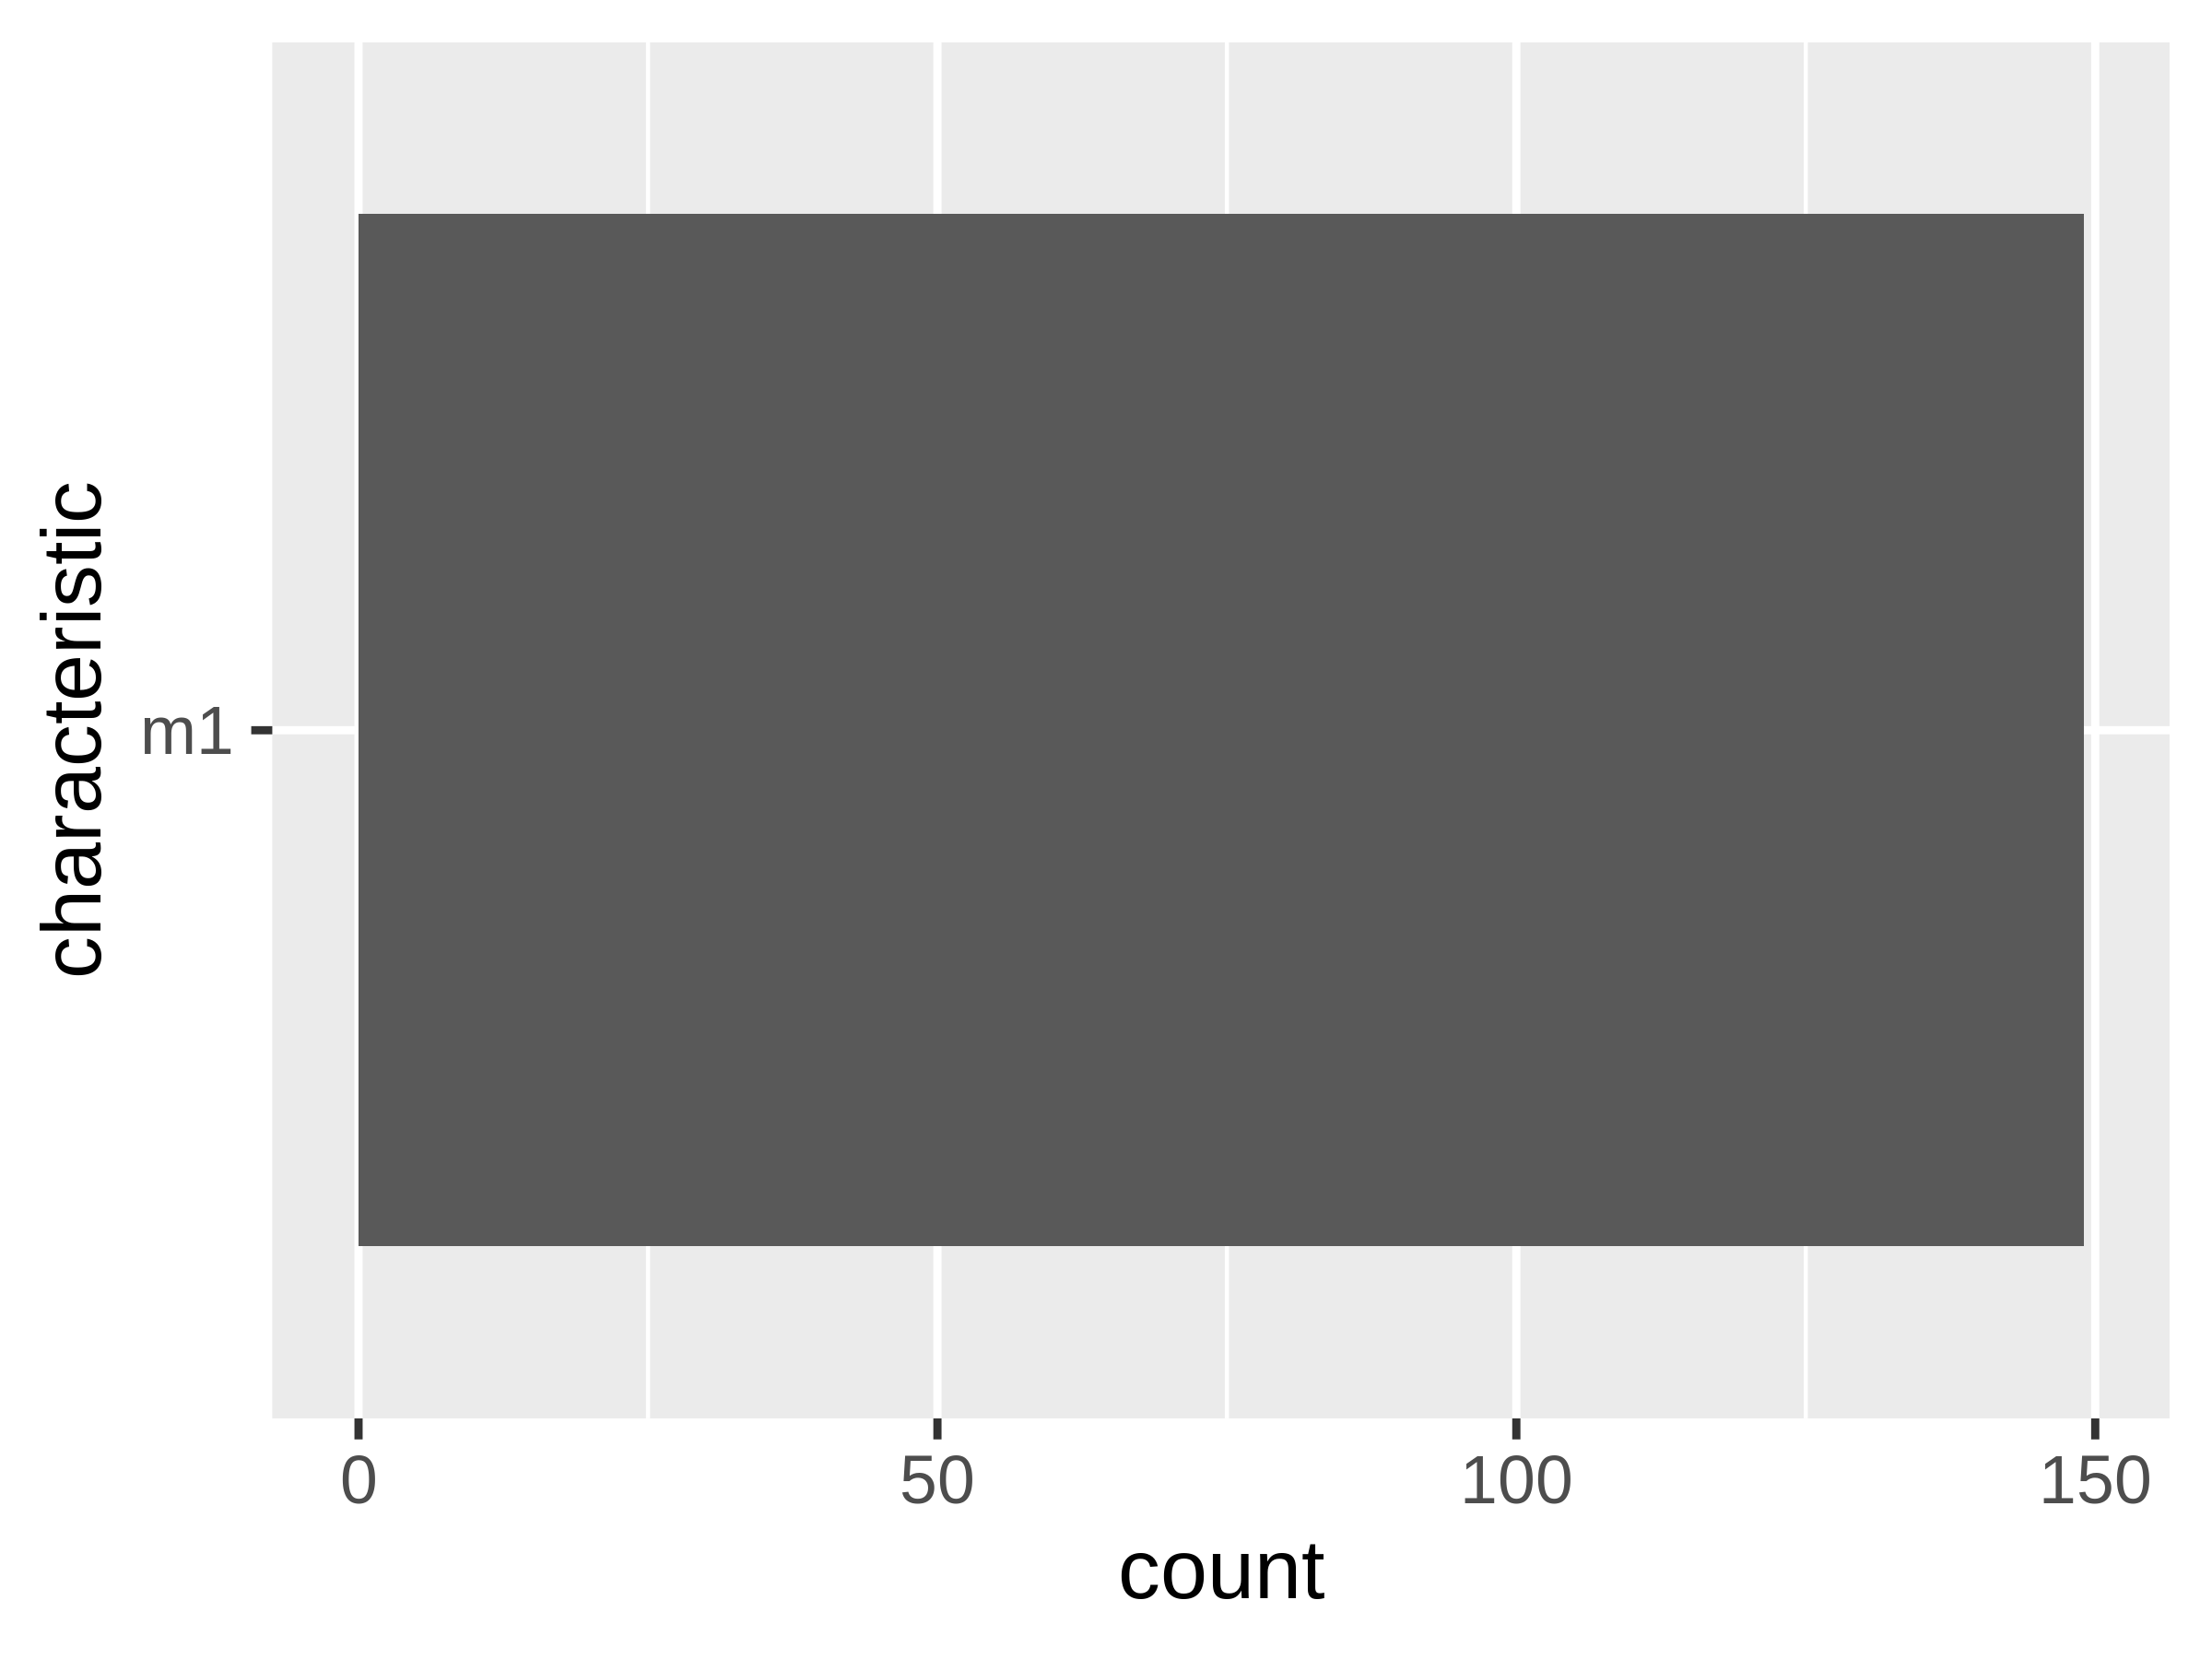

In [4]:
# make sure data manipulating is as you expected!
ggplot(df.m1, aes(y = characteristic)) + geom_bar()

Make a boxplot with `species` on the x-axis and `value` on the y-axis where value represents the `m1` characteristic.

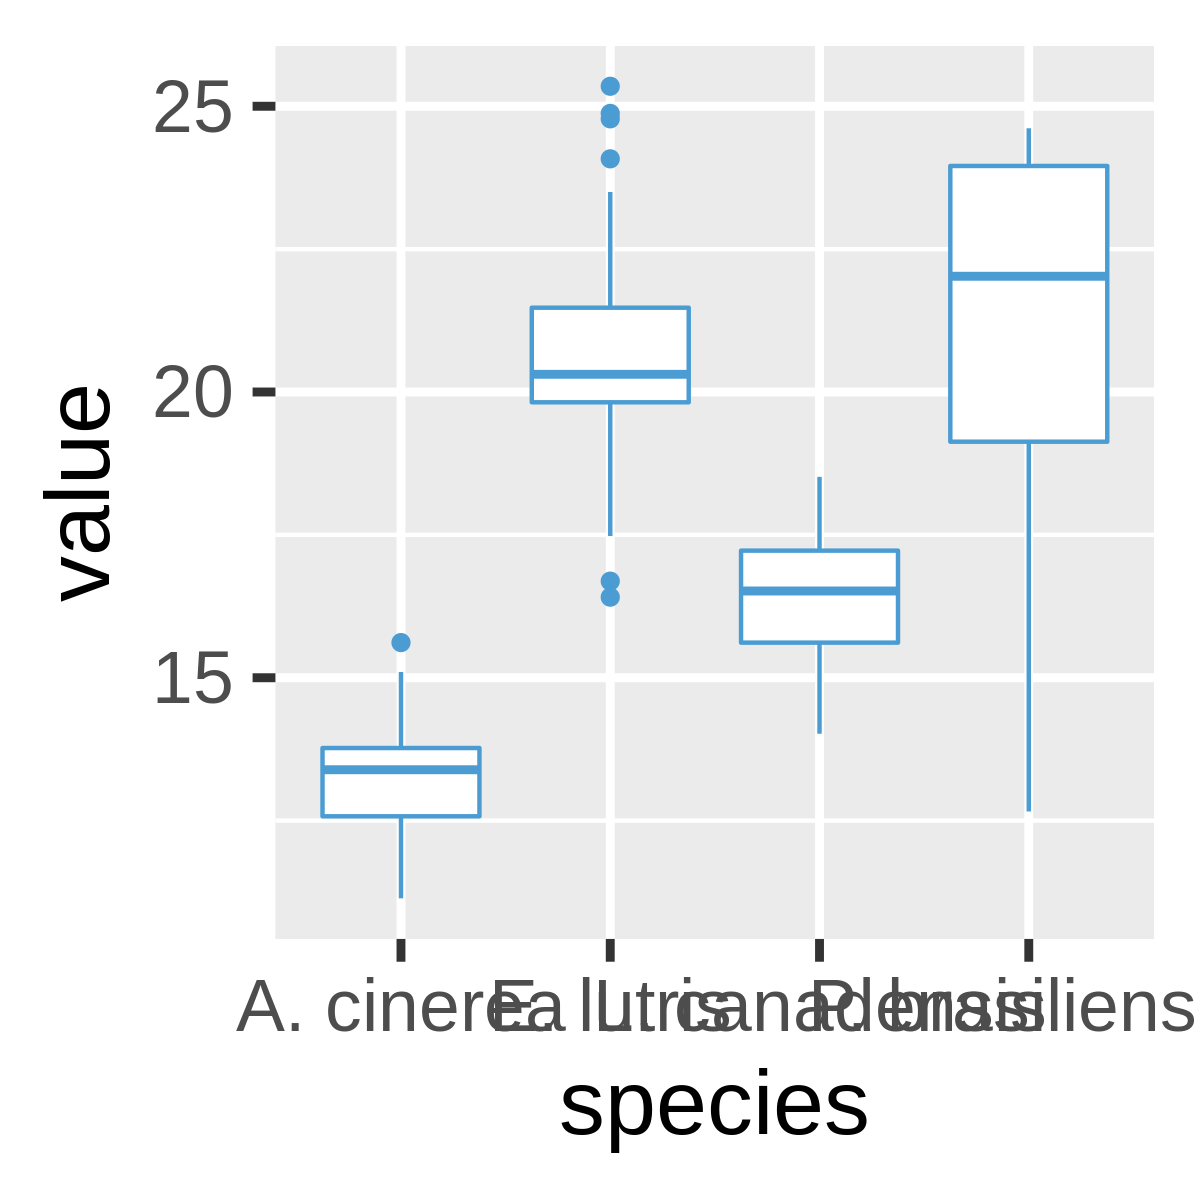

In [5]:
options(repr.plot.width=4, repr.plot.height=4, repr.plot.res = 300)

p = ggplot(df.m1, aes(x = species, y = value)) +
    geom_boxplot(color = '#4B9CD3')
p

Can you adjust the x-axis text so that it does not overlap? 

*Here's a hint, use this as an argument to `theme`:*
```R
axis.text.x = element_text(angle = 45, hjust = 1)
```

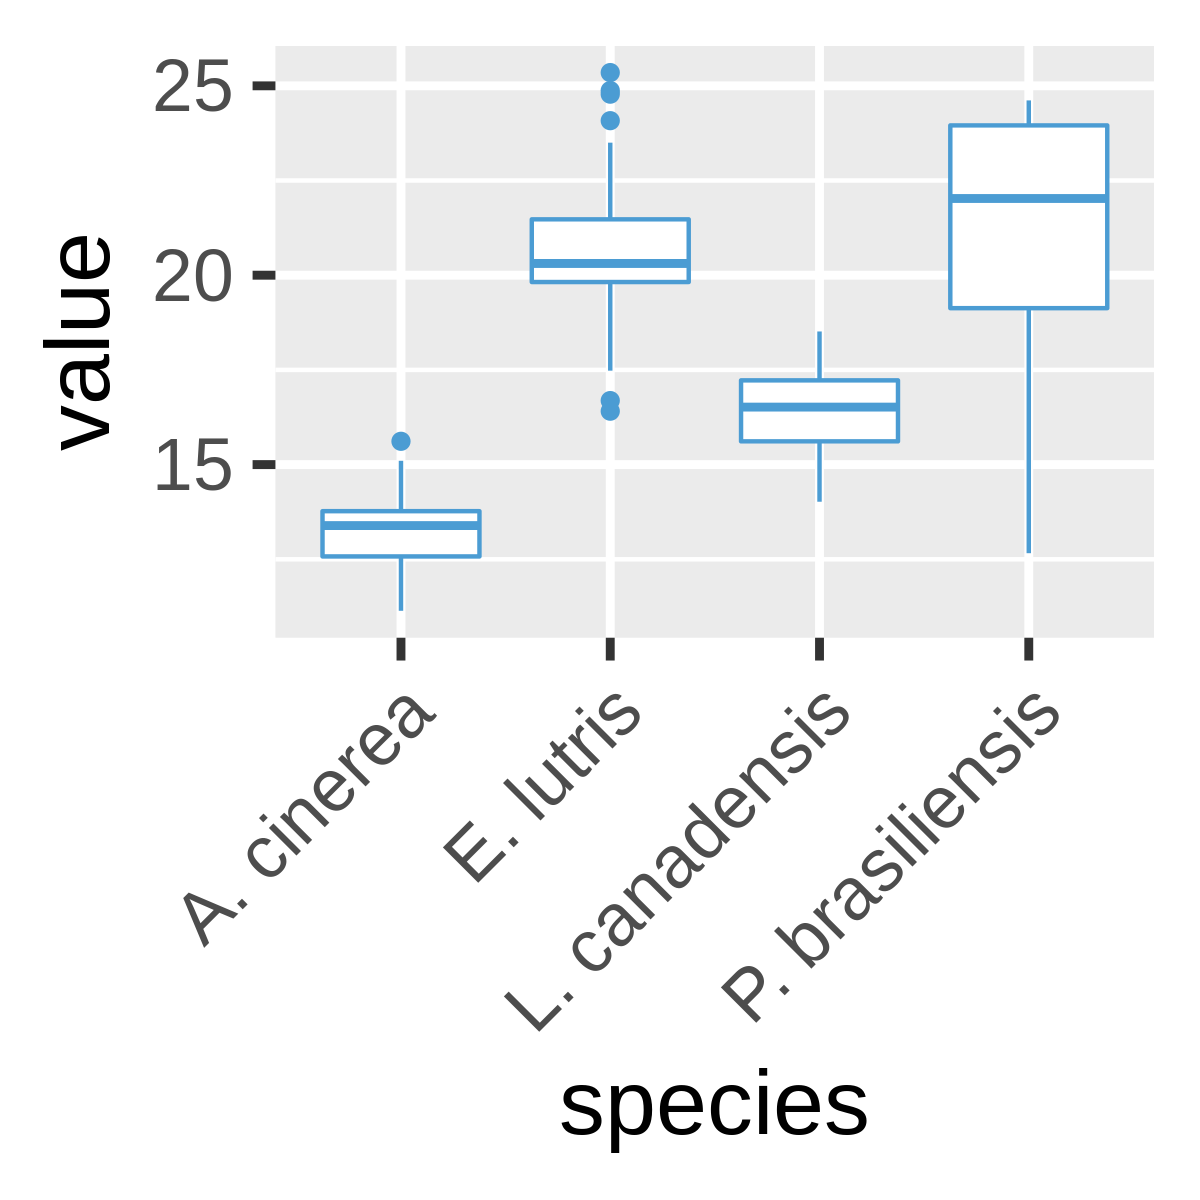

In [6]:
options(repr.plot.width=4, repr.plot.height=4, repr.plot.res = 300)

p = ggplot(df.m1, aes(x = species, y = value)) +
    geom_boxplot(color = '#4B9CD3') + 
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) 
p

Alternatively, you could "flip" the axis. Use `coord_flip` to put the `species` label on the y-axis.

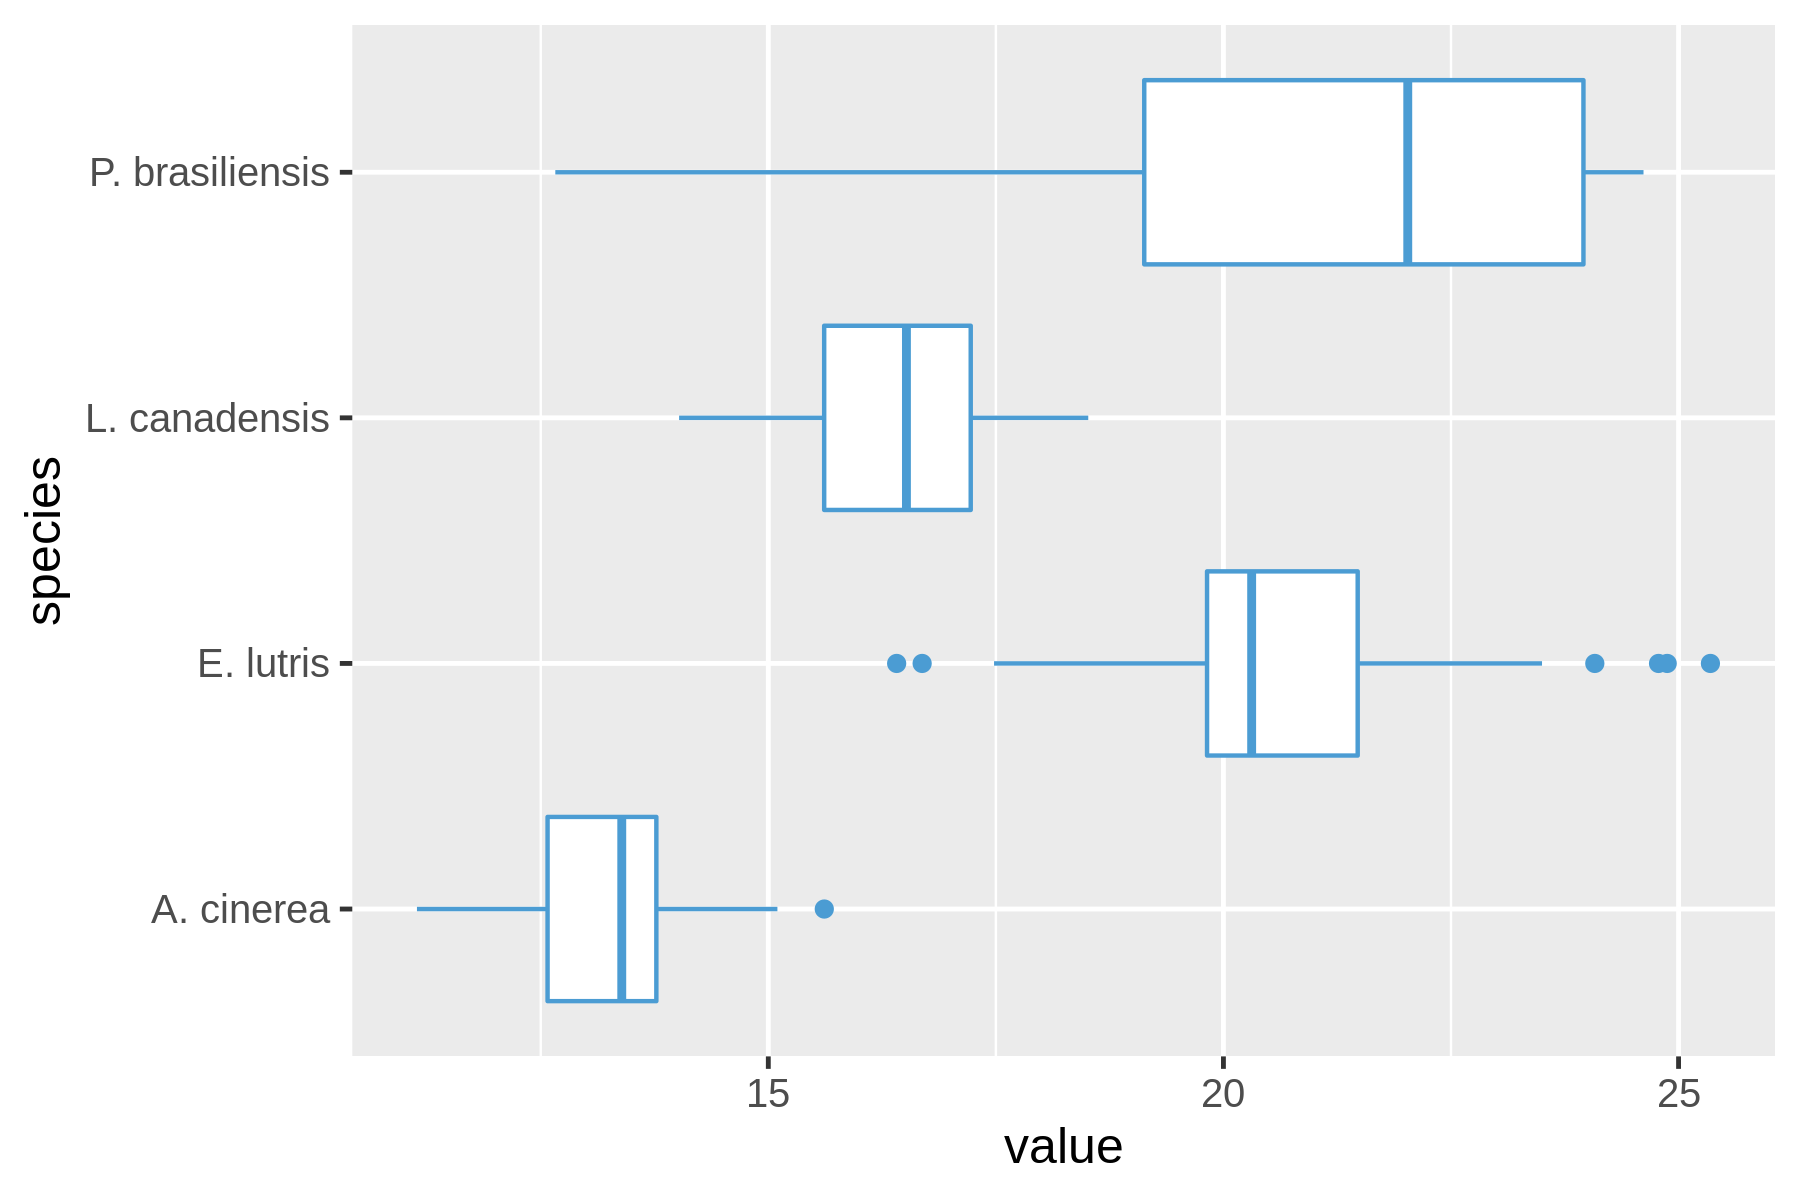

In [25]:
options(repr.plot.width=6, repr.plot.height=4, repr.plot.res = 300)
theme_set(theme_gray(base_size = 12))

p = ggplot(df.m1, aes(x = species, y = value)) +
    geom_boxplot(color = '#4B9CD3') + 
    coord_flip()
p

# Histograms and KDE

Preview the `diamonds` data set:

In [8]:
diamonds %>% head

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


Here is the diamonds set filtered to diamonds with clarity values of `I1` and `IF`.

In [9]:
df = diamonds %>% filter(clarity %in% c('I1', 'IF'))

df %>% head

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.32,Premium,E,I1,60.9,58,345,4.38,4.42,2.68
1.17,Very Good,J,I1,60.2,61,2774,6.83,6.90,4.13
1.01,Premium,F,I1,61.8,60,2781,6.39,6.36,3.94
0.52,Ideal,F,IF,62.2,55,2783,5.14,5.18,3.21
1.01,Fair,E,I1,64.5,58,2788,6.29,6.21,4.03
0.55,Ideal,G,IF,60.9,57,2789,5.28,5.30,3.22


Using `facet_wrap`, plot a histogram of `price` where each plot panel represents one `clarity` value (i.e. `I1` or `IF`). 

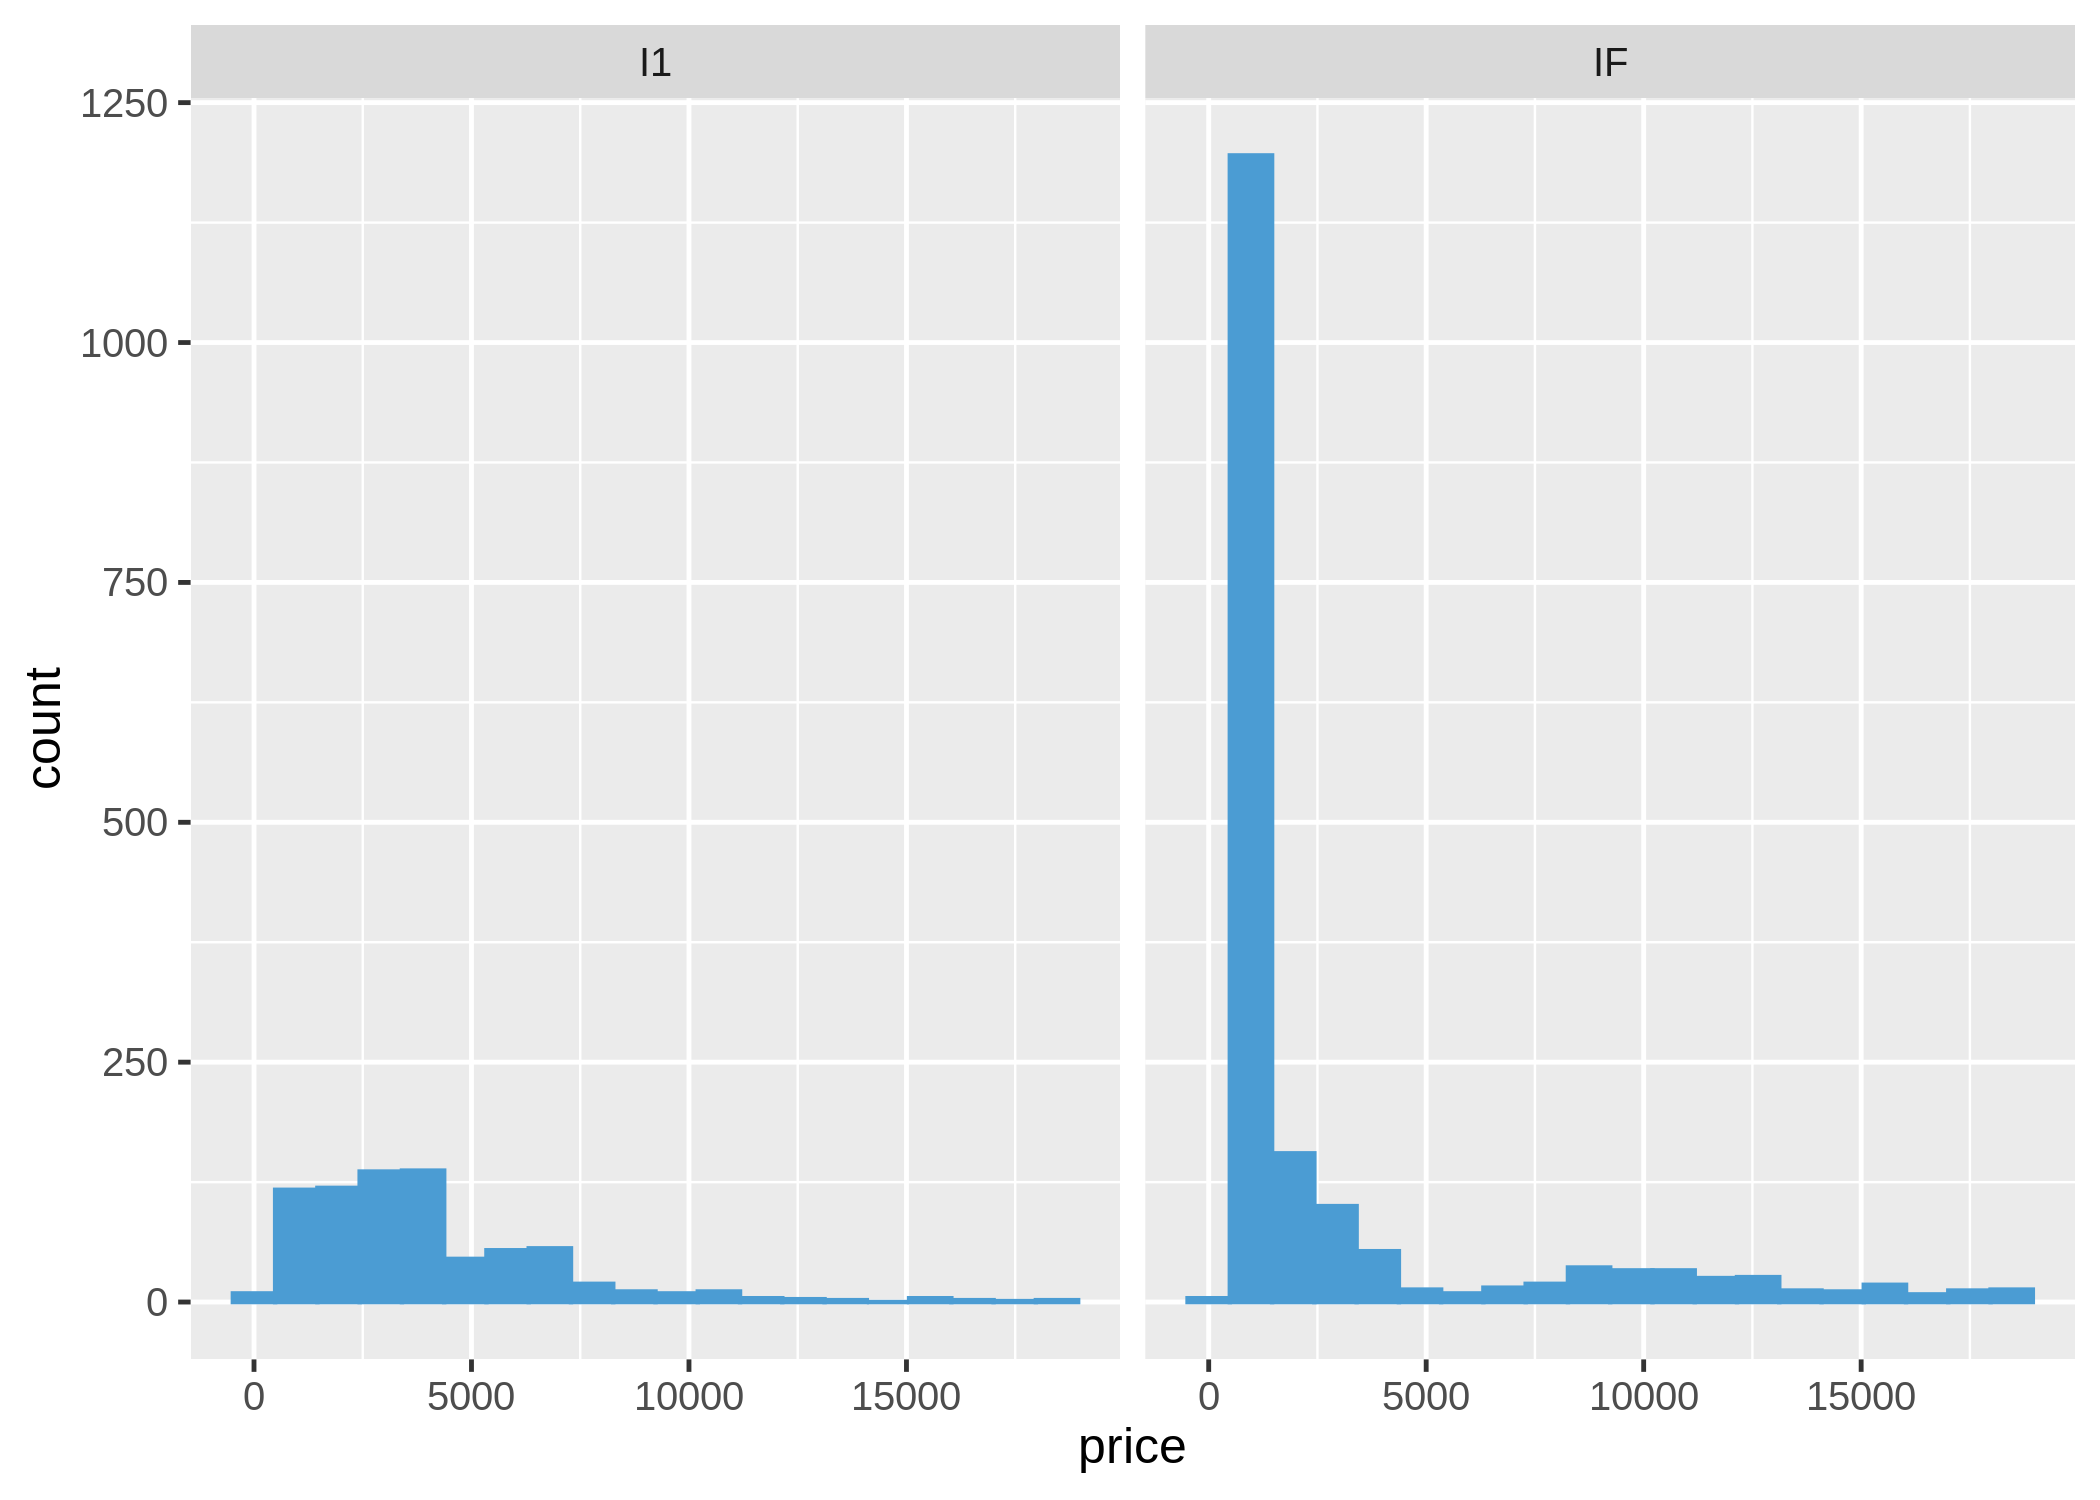

In [16]:
options(repr.plot.width=7, repr.plot.height=5, repr.plot.res = 300)
theme_set(theme_gray(base_size = 12))
p = ggplot(df, aes(x = price)) +
    geom_histogram(fill = '#4B9CD3', color = '#4B9CD3', bins = 20) + 
    facet_wrap(~clarity)
p

Do the same with the KDE geom.

<ScaleContinuousPosition>
 Range:  
 Limits:    0 --    1

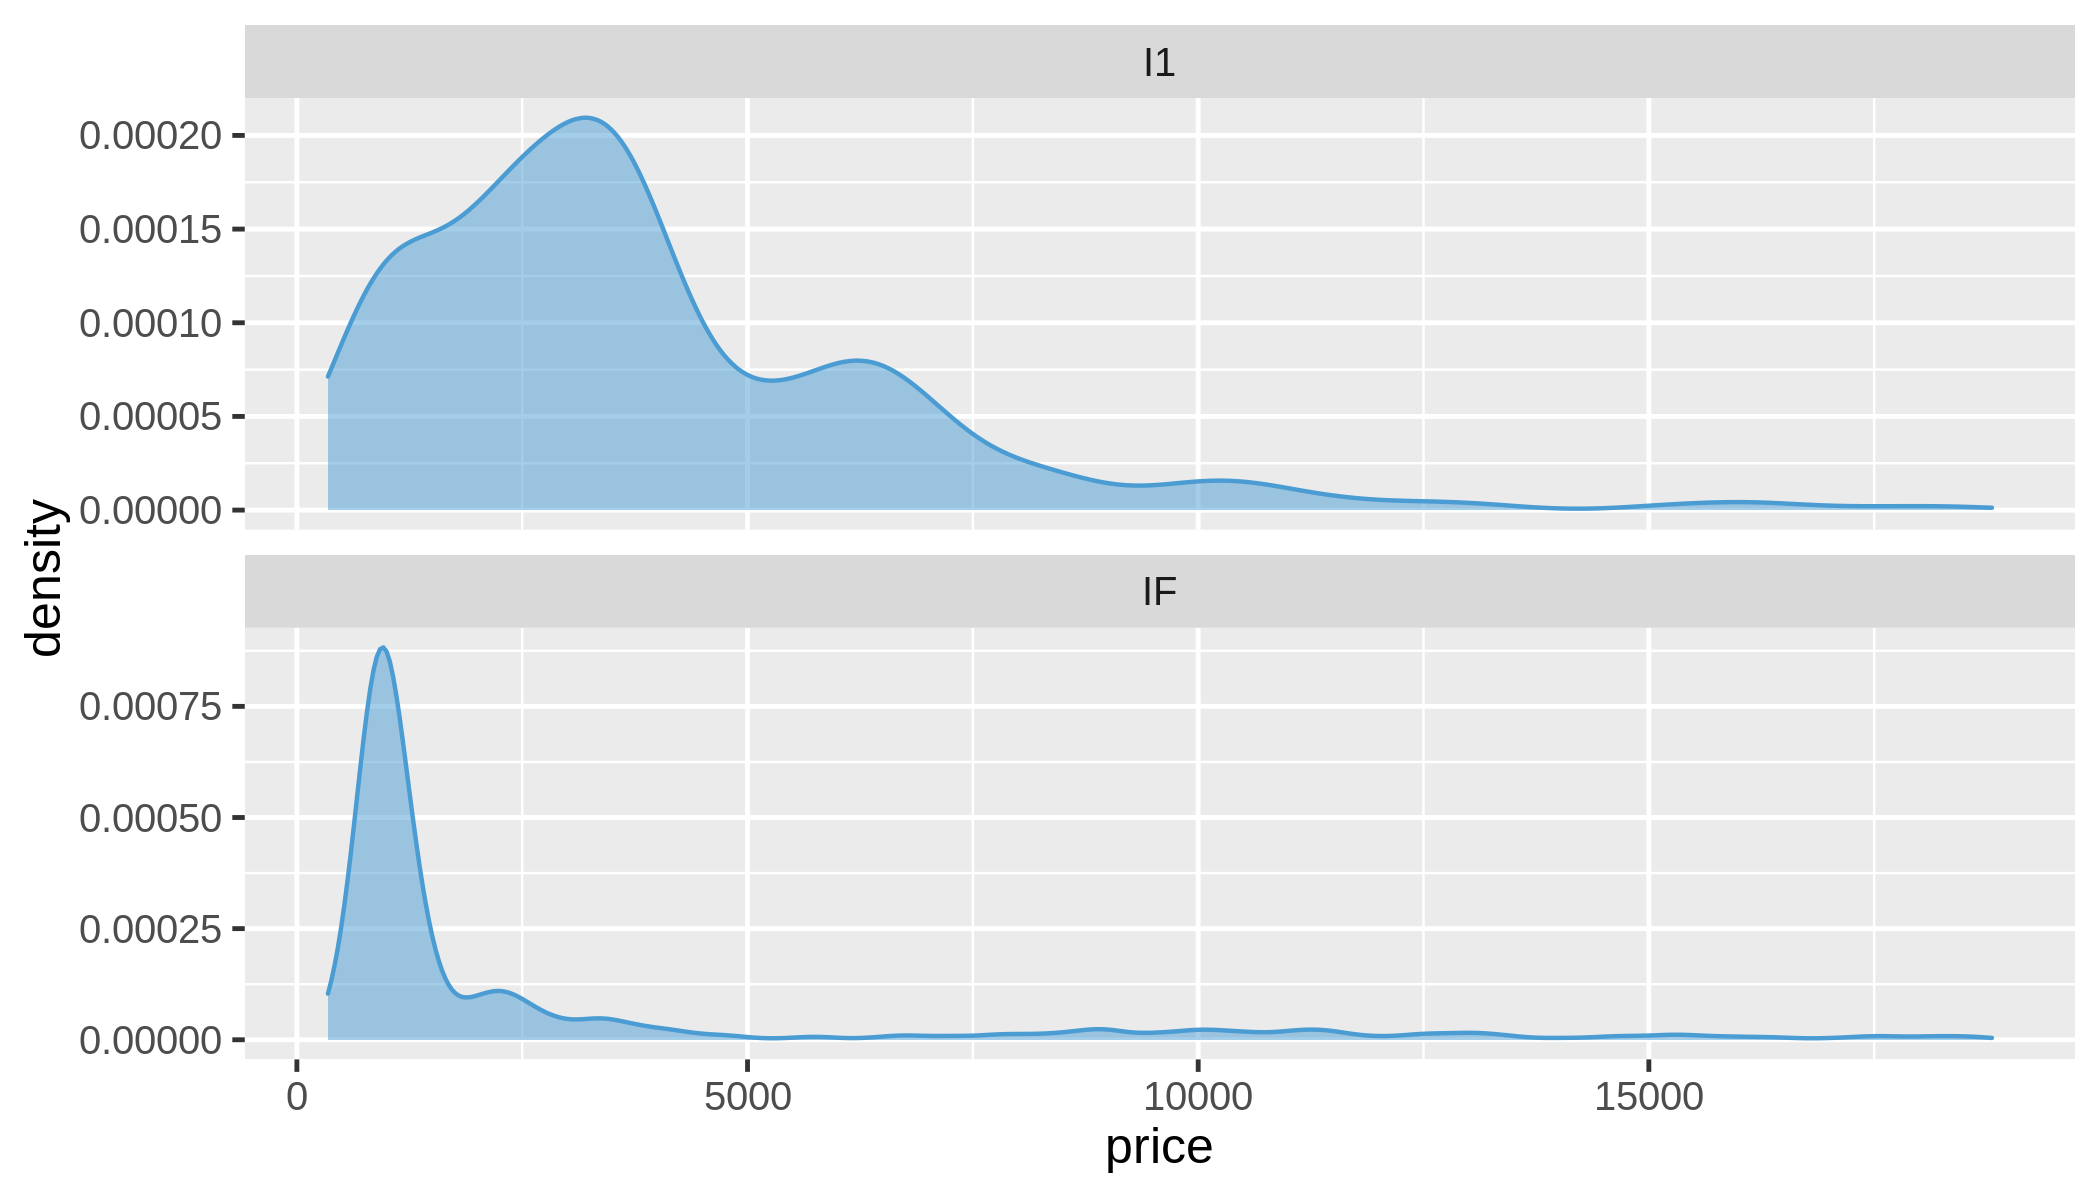

In [12]:
options(repr.plot.width=7, repr.plot.height=4, repr.plot.res = 300)
theme_set(theme_gray(base_size = 12))
p = ggplot(df, aes(x = price)) +
    facet_wrap(~clarity, ncol = 1, scales = 'free_y') + 
    geom_density(color = '#4B9CD3', fill = '#4B9CD3', alpha = 0.5)
    scale_x_continuous(labels = scales::dollar_format())
p

With the KDE geom, plot the two clarity groups on top of each other (*Hint: apply an aesthetic 
mapping of fill to clarity*). Adjust alpha so you can see and compare the distributions.

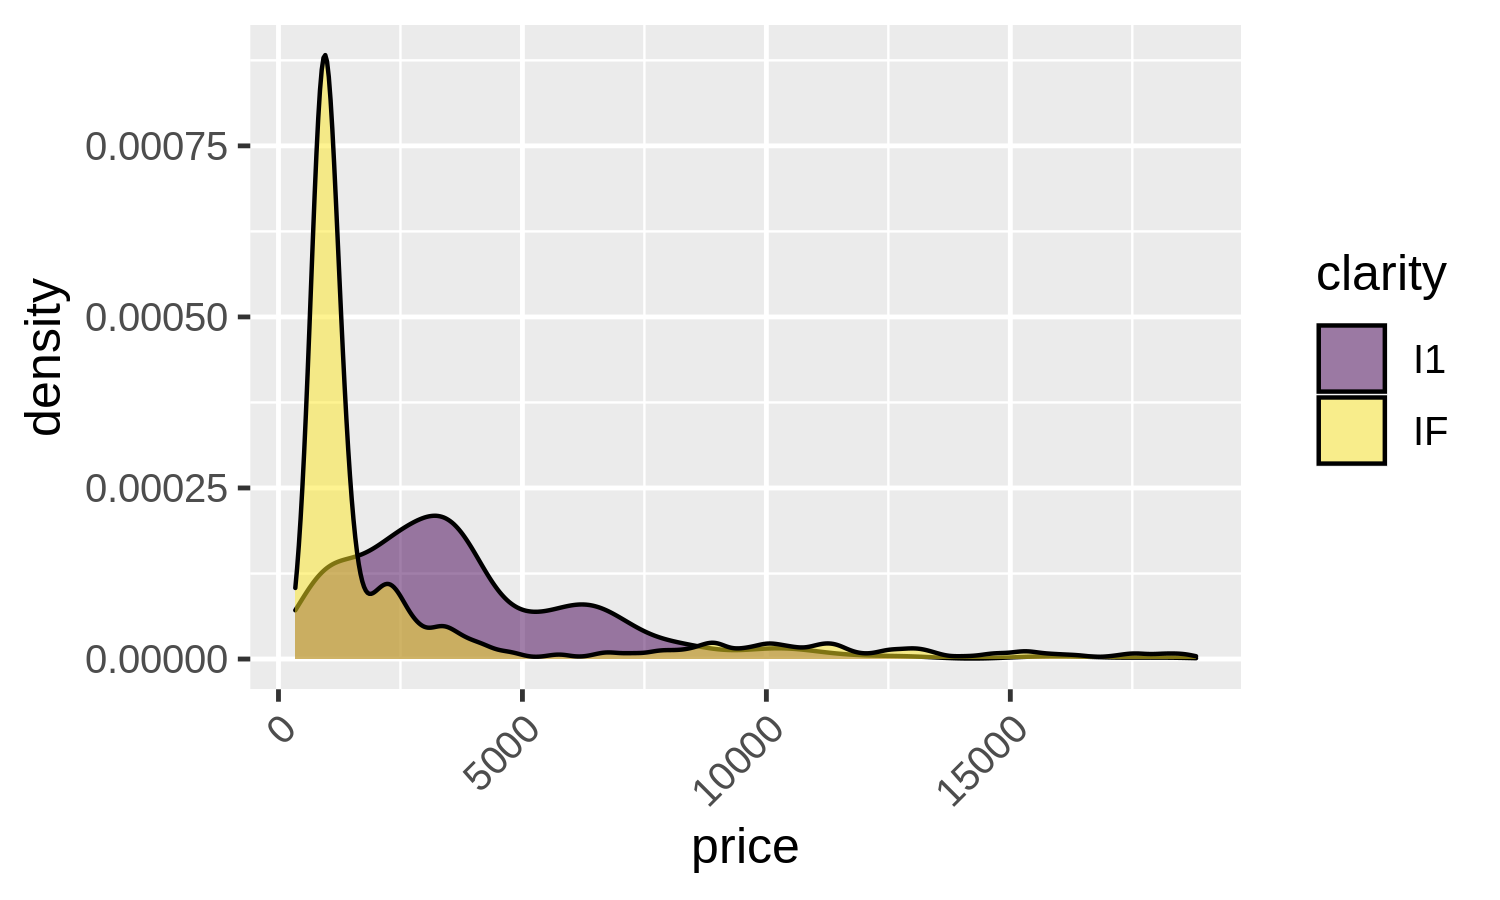

In [19]:
options(repr.plot.width=5, repr.plot.height=3, repr.plot.res = 300)
p = ggplot(df, aes(x = price, fill = clarity)) +
    geom_density(alpha = 0.5) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) 
p

# Rugs

Plot a histogram of `m1` values for otter skulls. Include a rug.

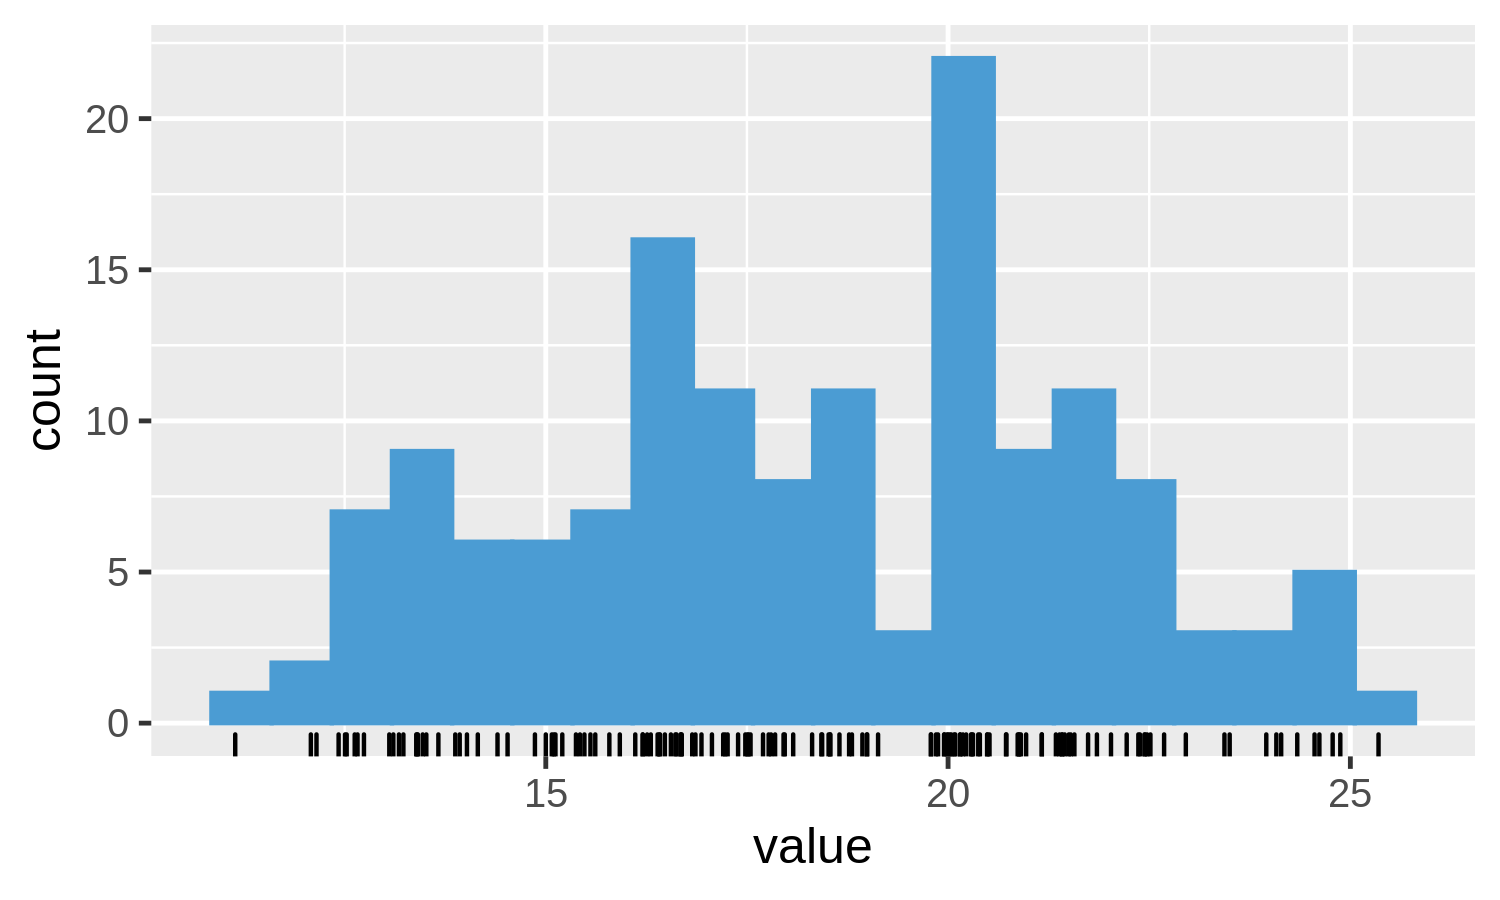

In [23]:
options(repr.plot.width=5, repr.plot.height=3, repr.plot.res = 300)
theme_set(theme_gray(base_size = 12))
p = ggplot(df.m1, aes(y = value)) + 
    geom_histogram(fill = '#4B9CD3', color = '#4B9CD3', bins = 20) +
    geom_rug() +
    coord_flip()
p

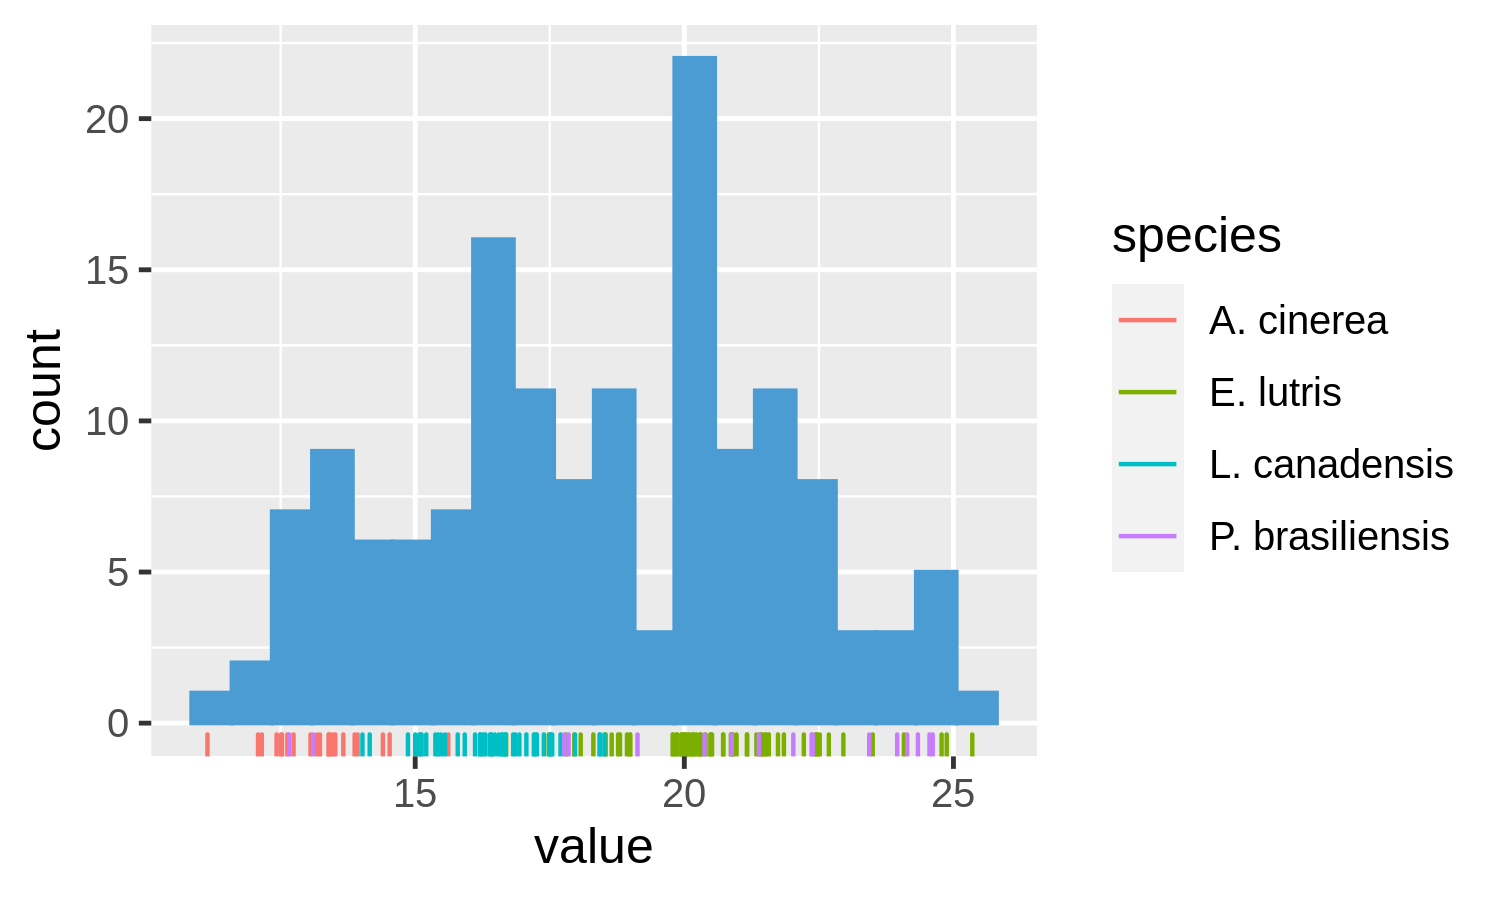

In [33]:
options(repr.plot.width=5, repr.plot.height=3, repr.plot.res = 300)
theme_set(theme_gray(base_size = 12))

p = ggplot(df.m1, aes(x = value)) + 
    geom_histogram(fill = '#4B9CD3', color = '#4B9CD3', bins = 20) +
    geom_rug(mapping = aes(color = species))

p

Can you leave the histogram as is and color the rug ticks by `species`?

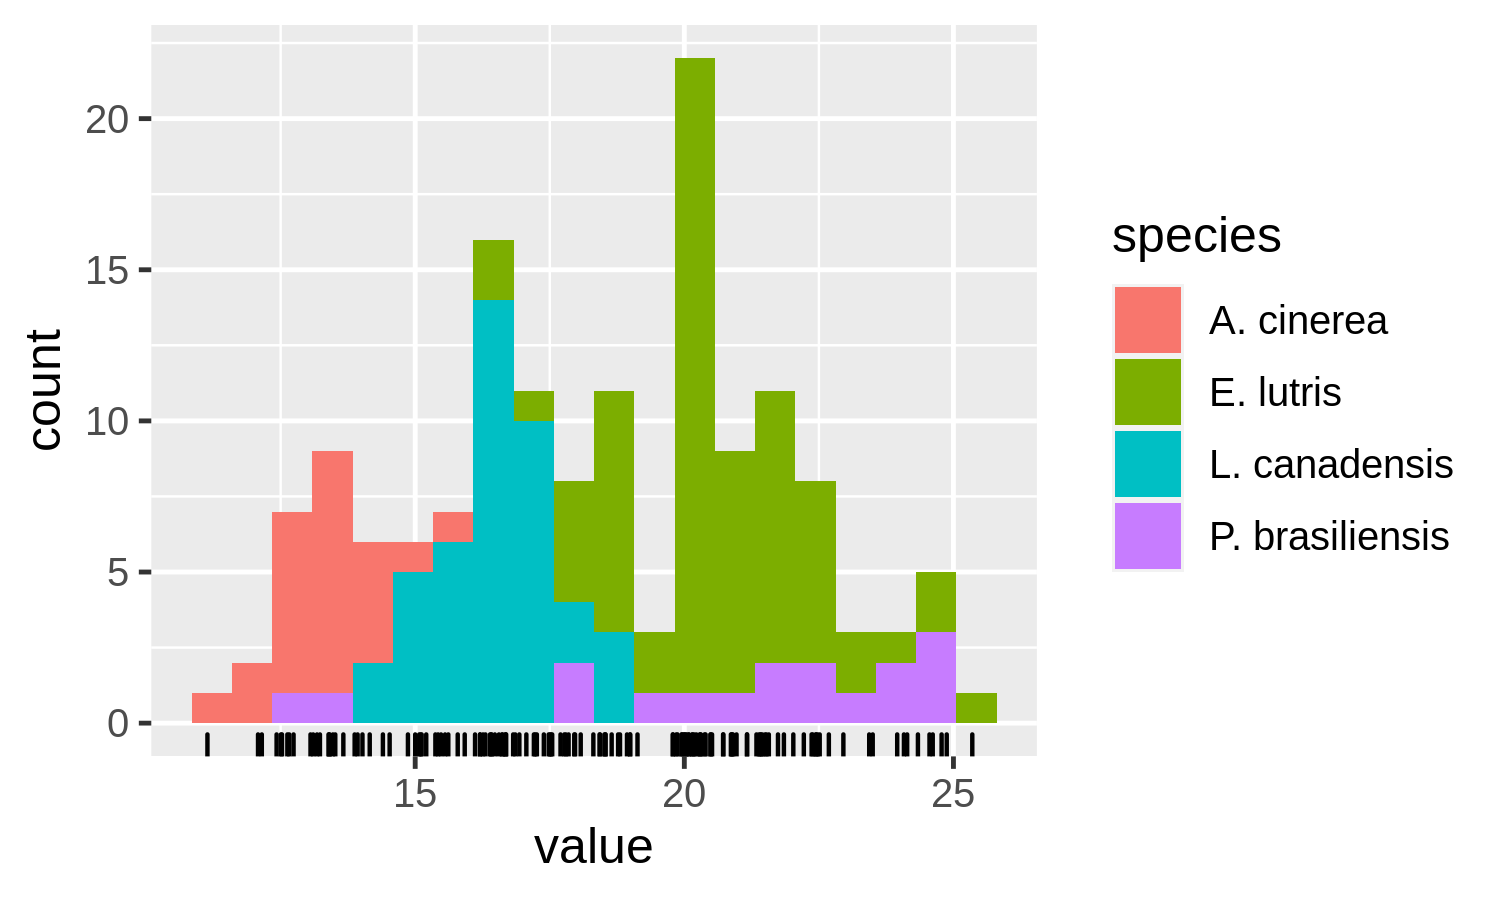

In [24]:
options(repr.plot.width=5, repr.plot.height=3, repr.plot.res = 300)
theme_set(theme_gray(base_size = 12))
p = ggplot(df.m1, aes(y = value, fill = species)) + 
    geom_histogram(bins = 20) +
    geom_rug() + 
    coord_flip()
p